<a href="https://colab.research.google.com/github/Kartik1646/Phishing-Website-Detection-/blob/main/XGB_PhishingDetection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imorting Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

Importing Data

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.head()

,index,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [ ]:
df.describe()

,index,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Result', ylabel='count'>

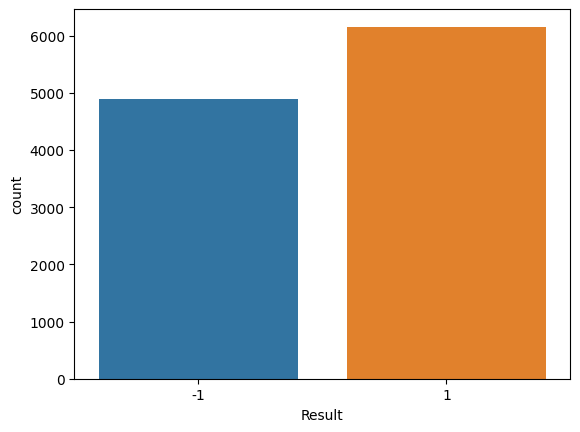

In [ ]:
# Visualizing the data
sns.countplot(x='Result', data=df)

Data preprocessing

In [ ]:
# Convert Result column values to 0 or 1
df['Result'] = np.where(df['Result']==-1, 1, 0)

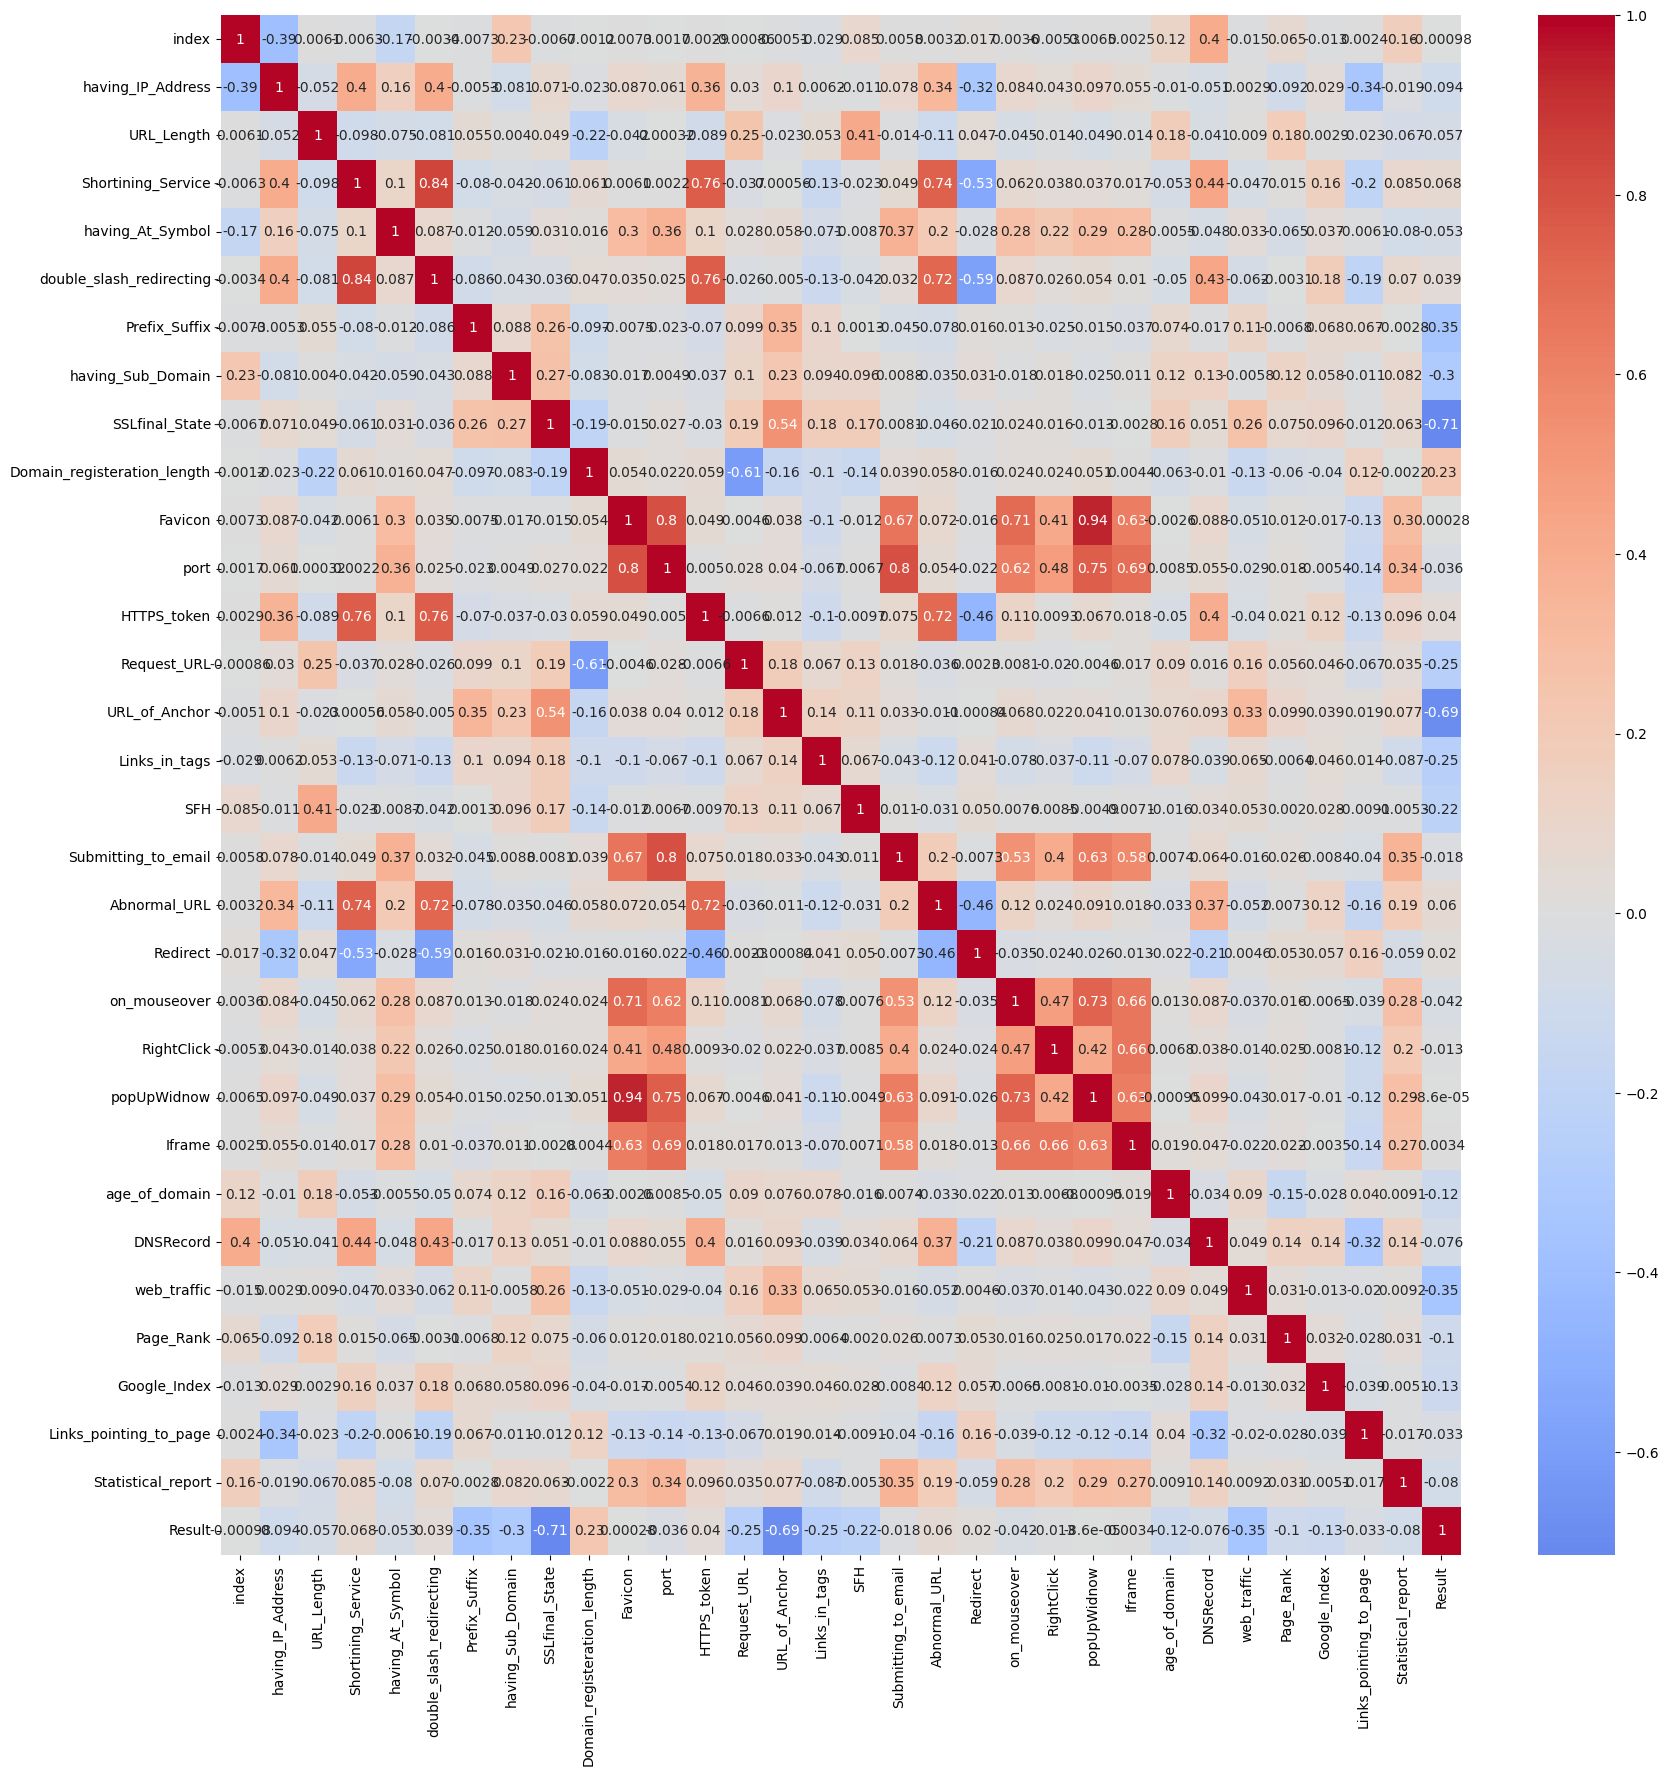

In [ ]:
# Plot correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Separate features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Feature selection using mutual information
best_features = SelectKBest(score_func=mutual_info_classif, k=20)
fit = best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(20, 'Score'))

# Extract selected features
selected_features = feature_scores.nlargest(20, 'Score')['Feature'].tolist()
X = X[selected_features]


                        Feature     Score
8                SSLfinal_State  0.349632
14                URL_of_Anchor  0.323947
6                 Prefix_Suffix  0.079350
26                  web_traffic  0.077821
7             having_Sub_Domain  0.077370
15                Links_in_tags  0.036912
9   Domain_registeration_length  0.031736
16                          SFH  0.023639
13                  Request_URL  0.022471
28                 Google_Index  0.012666
1             having_IP_Address  0.009880
23                       Iframe  0.009556
20                 on_mouseover  0.007963
24                age_of_domain  0.007063
19                     Redirect  0.005887
27                    Page_Rank  0.005739
2                    URL_Length  0.005101
11                         port  0.004830
17          Submitting_to_email  0.004638
3            Shortining_Service  0.002162


Train Test Split

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBoost Model 

In [ ]:
# Create an XGBoost classifier and fit it to the training data
# Step 6: Training the Model
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Step 7: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': [0.01, 0.1],
              'max_depth': [3, 5, 7],
              'min_child_weight': [1, 3, 5],
              'subsample': [0.5, 0.7],
              'colsample_bytree': [0.5, 0.7],
              'n_estimators': [50, 100, 200]}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)


Best Accuracy: 0.9613293549798054
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}


Testing

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Results

In [ ]:
# Calculating the accuracy, precision, recall, and F1 score

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9647218453188603
Precision: 0.9670212765957447
Recall: 0.950836820083682
F1 Score: 0.9588607594936709
